Skład grupy:
    Paweł Awramiuk
    Anna Chojnowska
    Piotr Grusza
    Szymon Leszczyński

In [1]:
## Polecenia do instalacji pakietów
# conda install -c conda-forge tensorflow
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras import models, layers

## Konfiguracje globalne
# Formatowanie liczb w DataFrame
pd.set_option('display.precision', 2)
pd.set_option('display.float_format', '{:.2f}'.format)

In [2]:
data_ALL = pd.read_csv("data_ALL.csv")
data_ALL

,Unnamed: 0,squareMeters,rooms,floor,floorCount,buildYear,latitude,longitude,centreDistance,poiCount,...,city_katowice,city_krakow,city_lodz,city_lublin,city_poznan,city_radom,city_rzeszow,city_szczecin,city_warszawa,city_wroclaw
0,1345,-0.59,-0.74,0.14,0.64,1.00,-1.46,0.10,0.57,-0.78,...,0,1,0,0,0,0,0,0,0,0
1,1346,-0.82,-0.74,-0.58,-0.73,1.00,-1.46,0.11,0.26,-0.88,...,0,1,0,0,0,0,0,0,0,0
2,1347,0.78,0.55,0.14,-1.19,-0.02,-1.43,0.13,-1.43,0.73,...,0,1,0,0,0,0,0,0,0,0
3,1348,1.02,0.55,0.14,-0.28,-0.02,-1.46,0.18,1.10,-0.50,...,0,1,0,0,0,0,0,0,0,0
4,1349,-0.12,-0.74,-1.31,-1.19,-0.02,-1.41,0.13,-1.10,2.06,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35075,51303,2.51,0.55,0.14,-0.73,-2.47,1.05,-1.07,-1.54,3.30,...,0,0,0,0,0,0,0,0,0,0
35076,51305,2.09,1.85,-0.58,-1.19,0.92,1.06,-1.05,-0.64,-0.12,...,0,0,0,0,0,0,0,0,0,0
35077,51307,2.23,1.85,0.14,-1.19,-2.01,1.05,-1.08,-1.55,1.40,...,0,0,0,0,0,0,0,0,0,0
35078,51309,2.29,1.85,0.14,-1.19,0.28,1.04,-1.10,-0.59,-0.50,...,0,0,0,0,0,0,0,0,0,0


In [3]:
data_ALL.drop(columns=['Unnamed: 0'], inplace=True)
data_ALL

,squareMeters,rooms,floor,floorCount,buildYear,latitude,longitude,centreDistance,poiCount,hasParkingSpace,...,city_katowice,city_krakow,city_lodz,city_lublin,city_poznan,city_radom,city_rzeszow,city_szczecin,city_warszawa,city_wroclaw
0,-0.59,-0.74,0.14,0.64,1.00,-1.46,0.10,0.57,-0.78,0,...,0,1,0,0,0,0,0,0,0,0
1,-0.82,-0.74,-0.58,-0.73,1.00,-1.46,0.11,0.26,-0.88,0,...,0,1,0,0,0,0,0,0,0,0
2,0.78,0.55,0.14,-1.19,-0.02,-1.43,0.13,-1.43,0.73,0,...,0,1,0,0,0,0,0,0,0,0
3,1.02,0.55,0.14,-0.28,-0.02,-1.46,0.18,1.10,-0.50,0,...,0,1,0,0,0,0,0,0,0,0
4,-0.12,-0.74,-1.31,-1.19,-0.02,-1.41,0.13,-1.10,2.06,1,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35075,2.51,0.55,0.14,-0.73,-2.47,1.05,-1.07,-1.54,3.30,0,...,0,0,0,0,0,0,0,0,0,0
35076,2.09,1.85,-0.58,-1.19,0.92,1.06,-1.05,-0.64,-0.12,1,...,0,0,0,0,0,0,0,0,0,0
35077,2.23,1.85,0.14,-1.19,-2.01,1.05,-1.08,-1.55,1.40,0,...,0,0,0,0,0,0,0,0,0,0
35078,2.29,1.85,0.14,-1.19,0.28,1.04,-1.10,-0.59,-0.50,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
train_dataset = data_ALL.sample(frac=0.8, random_state=0)
test_dataset = data_ALL.drop(train_dataset.index)

train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('price')
test_labels = test_features.pop('price')

In [5]:
#sns.pairplot(train_dataset[['price', 'floor', 'squareMeters', 'centreDistance']], diag_kind='kde')

In [6]:
train_features = tf.convert_to_tensor(train_features)
test_features = tf.convert_to_tensor(test_features)

In [7]:
model = models.Sequential(
[
    layers.Dense(32, kernel_initializer='normal', activation='relu'),
    layers.Dense(16, kernel_initializer='normal', activation='relu'),
    layers.Dense(8, kernel_initializer='normal', activation='relu'),
    layers.Dense(4, kernel_initializer='normal', activation='relu'),
    layers.Dense(2, kernel_initializer='normal', activation='relu'),
    layers.Dense(1, kernel_initializer='normal',activation='linear')
])
model.compile(
    optimizer=tf.optimizers.Adam(),
    loss='mean_absolute_error',
    metrics=['mean_absolute_error'])

In [8]:
history = model.fit(
    train_features,
    train_labels,
    epochs=1000,
    validation_split = 0.15)

Epoch 1/1000
746/746 [==============================] - 4s 3ms/step - loss: 571146.6250 - mean_absolute_error: 571146.6250 - val_loss: 207421.3750 - val_mean_absolute_error: 207421.3750
Epoch 2/1000
746/746 [==============================] - 2s 3ms/step - loss: 187527.5469 - mean_absolute_error: 187527.5469 - val_loss: 168075.7031 - val_mean_absolute_error: 168075.7031
Epoch 3/1000
746/746 [==============================] - 2s 3ms/step - loss: 158664.2969 - mean_absolute_error: 158664.2969 - val_loss: 145824.5156 - val_mean_absolute_error: 145824.5156
Epoch 4/1000
746/746 [==============================] - 2s 3ms/step - loss: 141268.6562 - mean_absolute_error: 141268.6562 - val_loss: 132703.8906 - val_mean_absolute_error: 132703.8906
Epoch 5/1000
746/746 [==============================] - 2s 3ms/step - loss: 130621.2656 - mean_absolute_error: 130621.2656 - val_loss: 123673.8906 - val_mean_absolute_error: 123673.8906
Epoch 6/1000
746/746 [==============================] - 2s 3ms/step - 

746/746 [==============================] - 2s 3ms/step - loss: 98234.8516 - mean_absolute_error: 98234.8516 - val_loss: 95213.6328 - val_mean_absolute_error: 95213.6328
Epoch 46/1000
746/746 [==============================] - 2s 3ms/step - loss: 98111.9062 - mean_absolute_error: 98111.9062 - val_loss: 95112.3125 - val_mean_absolute_error: 95112.3125
Epoch 47/1000
746/746 [==============================] - 2s 3ms/step - loss: 97961.2656 - mean_absolute_error: 97961.2656 - val_loss: 95001.7031 - val_mean_absolute_error: 95001.7031
Epoch 48/1000
746/746 [==============================] - 2s 3ms/step - loss: 97842.5703 - mean_absolute_error: 97842.5703 - val_loss: 94833.7656 - val_mean_absolute_error: 94833.7656
Epoch 49/1000
746/746 [==============================] - 2s 3ms/step - loss: 97635.2266 - mean_absolute_error: 97635.2266 - val_loss: 94711.7578 - val_mean_absolute_error: 94711.7578
Epoch 50/1000
746/746 [==============================] - 2s 3ms/step - loss: 97596.5938 - mean_abso

Epoch 90/1000
746/746 [==============================] - 2s 3ms/step - loss: 95690.1016 - mean_absolute_error: 95690.1016 - val_loss: 93102.6641 - val_mean_absolute_error: 93102.6641
Epoch 91/1000
746/746 [==============================] - 2s 2ms/step - loss: 95624.7969 - mean_absolute_error: 95624.7969 - val_loss: 92951.5938 - val_mean_absolute_error: 92951.5938
Epoch 92/1000
746/746 [==============================] - 2s 2ms/step - loss: 95626.2422 - mean_absolute_error: 95626.2422 - val_loss: 92923.3984 - val_mean_absolute_error: 92923.3984
Epoch 93/1000
746/746 [==============================] - 2s 3ms/step - loss: 95565.7891 - mean_absolute_error: 95565.7891 - val_loss: 93032.7656 - val_mean_absolute_error: 93032.7656
Epoch 94/1000
746/746 [==============================] - 2s 3ms/step - loss: 95556.0547 - mean_absolute_error: 95556.0547 - val_loss: 93296.3281 - val_mean_absolute_error: 93296.3281
Epoch 95/1000
746/746 [==============================] - 2s 3ms/step - loss: 95545.50

746/746 [==============================] - 2s 3ms/step - loss: 94937.9688 - mean_absolute_error: 94937.9688 - val_loss: 92674.3828 - val_mean_absolute_error: 92674.3828
Epoch 135/1000
746/746 [==============================] - 2s 3ms/step - loss: 94898.4609 - mean_absolute_error: 94898.4609 - val_loss: 92718.1094 - val_mean_absolute_error: 92718.1094
Epoch 136/1000
746/746 [==============================] - 2s 3ms/step - loss: 94988.7266 - mean_absolute_error: 94988.7266 - val_loss: 92394.0625 - val_mean_absolute_error: 92394.0625
Epoch 137/1000
746/746 [==============================] - 2s 3ms/step - loss: 94936.7031 - mean_absolute_error: 94936.7031 - val_loss: 92724.2109 - val_mean_absolute_error: 92724.2109
Epoch 138/1000
746/746 [==============================] - 2s 3ms/step - loss: 94921.2891 - mean_absolute_error: 94921.2891 - val_loss: 92397.2656 - val_mean_absolute_error: 92397.2656
Epoch 139/1000
746/746 [==============================] - 2s 3ms/step - loss: 94986.2422 - mean

746/746 [==============================] - 2s 3ms/step - loss: 94584.9844 - mean_absolute_error: 94584.9844 - val_loss: 92109.7422 - val_mean_absolute_error: 92109.7422
Epoch 179/1000
746/746 [==============================] - 2s 3ms/step - loss: 94583.3750 - mean_absolute_error: 94583.3750 - val_loss: 92098.9297 - val_mean_absolute_error: 92098.9297
Epoch 180/1000
746/746 [==============================] - 2s 3ms/step - loss: 94519.1328 - mean_absolute_error: 94519.1328 - val_loss: 92024.9297 - val_mean_absolute_error: 92024.9297
Epoch 181/1000
746/746 [==============================] - 2s 3ms/step - loss: 94565.2266 - mean_absolute_error: 94565.2266 - val_loss: 92095.6016 - val_mean_absolute_error: 92095.6016
Epoch 182/1000
746/746 [==============================] - 2s 3ms/step - loss: 94557.6484 - mean_absolute_error: 94557.6484 - val_loss: 92173.3438 - val_mean_absolute_error: 92173.3438
Epoch 183/1000
746/746 [==============================] - 2s 3ms/step - loss: 94500.2109 - mean

746/746 [==============================] - 2s 3ms/step - loss: 94258.3125 - mean_absolute_error: 94258.3125 - val_loss: 91929.2500 - val_mean_absolute_error: 91929.2500
Epoch 223/1000
746/746 [==============================] - 2s 3ms/step - loss: 94322.4453 - mean_absolute_error: 94322.4453 - val_loss: 91960.1562 - val_mean_absolute_error: 91960.1562
Epoch 224/1000
746/746 [==============================] - 2s 3ms/step - loss: 94239.2734 - mean_absolute_error: 94239.2734 - val_loss: 92595.8594 - val_mean_absolute_error: 92595.8594
Epoch 225/1000
746/746 [==============================] - 2s 3ms/step - loss: 94262.2812 - mean_absolute_error: 94262.2812 - val_loss: 91896.8984 - val_mean_absolute_error: 91896.8984
Epoch 226/1000
746/746 [==============================] - 2s 3ms/step - loss: 94306.7578 - mean_absolute_error: 94306.7578 - val_loss: 92419.0703 - val_mean_absolute_error: 92419.0703
Epoch 227/1000
746/746 [==============================] - 2s 3ms/step - loss: 94226.9609 - mean

746/746 [==============================] - 2s 3ms/step - loss: 94002.8281 - mean_absolute_error: 94002.8281 - val_loss: 91886.7344 - val_mean_absolute_error: 91886.7344
Epoch 267/1000
746/746 [==============================] - 2s 3ms/step - loss: 93956.8828 - mean_absolute_error: 93956.8828 - val_loss: 91914.4453 - val_mean_absolute_error: 91914.4453
Epoch 268/1000
746/746 [==============================] - 2s 3ms/step - loss: 93900.8594 - mean_absolute_error: 93900.8594 - val_loss: 92427.3281 - val_mean_absolute_error: 92427.3281
Epoch 269/1000
746/746 [==============================] - 2s 3ms/step - loss: 93961.6484 - mean_absolute_error: 93961.6484 - val_loss: 91798.5312 - val_mean_absolute_error: 91798.5312
Epoch 270/1000
746/746 [==============================] - 2s 3ms/step - loss: 93916.2109 - mean_absolute_error: 93916.2109 - val_loss: 91755.1641 - val_mean_absolute_error: 91755.1641
Epoch 271/1000
746/746 [==============================] - 2s 3ms/step - loss: 93926.1172 - mean

746/746 [==============================] - 2s 3ms/step - loss: 93837.0859 - mean_absolute_error: 93837.0859 - val_loss: 91736.2656 - val_mean_absolute_error: 91736.2656
Epoch 311/1000
746/746 [==============================] - 2s 3ms/step - loss: 93802.6094 - mean_absolute_error: 93802.6094 - val_loss: 91683.0000 - val_mean_absolute_error: 91683.0000
Epoch 312/1000
746/746 [==============================] - 2s 3ms/step - loss: 93800.8906 - mean_absolute_error: 93800.8906 - val_loss: 91593.3516 - val_mean_absolute_error: 91593.3516
Epoch 313/1000
746/746 [==============================] - 2s 3ms/step - loss: 93747.4062 - mean_absolute_error: 93747.4062 - val_loss: 91700.5312 - val_mean_absolute_error: 91700.5312
Epoch 314/1000
746/746 [==============================] - 2s 3ms/step - loss: 93771.5000 - mean_absolute_error: 93771.5000 - val_loss: 91590.2812 - val_mean_absolute_error: 91590.2812
Epoch 315/1000
746/746 [==============================] - 2s 3ms/step - loss: 93788.1484 - mean

746/746 [==============================] - 2s 3ms/step - loss: 93736.5156 - mean_absolute_error: 93736.5156 - val_loss: 91573.7188 - val_mean_absolute_error: 91573.7188
Epoch 355/1000
746/746 [==============================] - 2s 3ms/step - loss: 93665.5781 - mean_absolute_error: 93665.5781 - val_loss: 91491.7969 - val_mean_absolute_error: 91491.7969
Epoch 356/1000
746/746 [==============================] - 2s 3ms/step - loss: 93619.9766 - mean_absolute_error: 93619.9766 - val_loss: 91547.2578 - val_mean_absolute_error: 91547.2578
Epoch 357/1000
746/746 [==============================] - 2s 3ms/step - loss: 93710.5938 - mean_absolute_error: 93710.5938 - val_loss: 91499.6328 - val_mean_absolute_error: 91499.6328
Epoch 358/1000
746/746 [==============================] - 2s 3ms/step - loss: 93633.9766 - mean_absolute_error: 93633.9766 - val_loss: 91389.8203 - val_mean_absolute_error: 91389.8203
Epoch 359/1000
746/746 [==============================] - 2s 3ms/step - loss: 93666.2500 - mean

746/746 [==============================] - 2s 3ms/step - loss: 93493.5938 - mean_absolute_error: 93493.5938 - val_loss: 91363.2500 - val_mean_absolute_error: 91363.2500
Epoch 399/1000
746/746 [==============================] - 2s 3ms/step - loss: 93565.7500 - mean_absolute_error: 93565.7500 - val_loss: 91349.6562 - val_mean_absolute_error: 91349.6562
Epoch 400/1000
746/746 [==============================] - 2s 3ms/step - loss: 93563.9453 - mean_absolute_error: 93563.9453 - val_loss: 91546.3047 - val_mean_absolute_error: 91546.3047
Epoch 401/1000
746/746 [==============================] - 2s 3ms/step - loss: 93550.3359 - mean_absolute_error: 93550.3359 - val_loss: 91372.6250 - val_mean_absolute_error: 91372.6250
Epoch 402/1000
746/746 [==============================] - 2s 3ms/step - loss: 93551.6641 - mean_absolute_error: 93551.6641 - val_loss: 91411.0078 - val_mean_absolute_error: 91411.0078
Epoch 403/1000
746/746 [==============================] - 2s 3ms/step - loss: 93585.3125 - mean

746/746 [==============================] - 2s 2ms/step - loss: 93440.1953 - mean_absolute_error: 93440.1953 - val_loss: 91237.3906 - val_mean_absolute_error: 91237.3906
Epoch 443/1000
746/746 [==============================] - 2s 2ms/step - loss: 93445.5078 - mean_absolute_error: 93445.5078 - val_loss: 91338.8203 - val_mean_absolute_error: 91338.8203
Epoch 444/1000
746/746 [==============================] - 2s 2ms/step - loss: 93470.2031 - mean_absolute_error: 93470.2031 - val_loss: 91283.4062 - val_mean_absolute_error: 91283.4062
Epoch 445/1000
746/746 [==============================] - 2s 2ms/step - loss: 93493.0078 - mean_absolute_error: 93493.0078 - val_loss: 91254.3438 - val_mean_absolute_error: 91254.3438
Epoch 446/1000
746/746 [==============================] - 2s 2ms/step - loss: 93493.0781 - mean_absolute_error: 93493.0781 - val_loss: 91452.8438 - val_mean_absolute_error: 91452.8438
Epoch 447/1000
746/746 [==============================] - 2s 2ms/step - loss: 93462.8516 - mean

746/746 [==============================] - 2s 3ms/step - loss: 93404.6797 - mean_absolute_error: 93404.6797 - val_loss: 91247.2656 - val_mean_absolute_error: 91247.2656
Epoch 487/1000
746/746 [==============================] - 2s 3ms/step - loss: 93407.7734 - mean_absolute_error: 93407.7734 - val_loss: 91373.1797 - val_mean_absolute_error: 91373.1797
Epoch 488/1000
746/746 [==============================] - 2s 2ms/step - loss: 93419.9062 - mean_absolute_error: 93419.9062 - val_loss: 91265.8203 - val_mean_absolute_error: 91265.8203
Epoch 489/1000
746/746 [==============================] - 2s 2ms/step - loss: 93391.4922 - mean_absolute_error: 93391.4922 - val_loss: 91663.6406 - val_mean_absolute_error: 91663.6406
Epoch 490/1000
746/746 [==============================] - 2s 2ms/step - loss: 93394.5938 - mean_absolute_error: 93394.5938 - val_loss: 91236.0000 - val_mean_absolute_error: 91236.0000
Epoch 491/1000
746/746 [==============================] - 2s 3ms/step - loss: 93408.2734 - mean

746/746 [==============================] - 2s 2ms/step - loss: 93299.6484 - mean_absolute_error: 93299.6484 - val_loss: 91181.0547 - val_mean_absolute_error: 91181.0547
Epoch 531/1000
746/746 [==============================] - 2s 2ms/step - loss: 93306.4062 - mean_absolute_error: 93306.4062 - val_loss: 91083.0234 - val_mean_absolute_error: 91083.0234
Epoch 532/1000
746/746 [==============================] - 2s 2ms/step - loss: 93310.1875 - mean_absolute_error: 93310.1875 - val_loss: 91277.6719 - val_mean_absolute_error: 91277.6719
Epoch 533/1000
746/746 [==============================] - 2s 2ms/step - loss: 93340.7969 - mean_absolute_error: 93340.7969 - val_loss: 91171.3047 - val_mean_absolute_error: 91171.3047
Epoch 534/1000
746/746 [==============================] - 2s 2ms/step - loss: 93295.5781 - mean_absolute_error: 93295.5781 - val_loss: 91197.3984 - val_mean_absolute_error: 91197.3984
Epoch 535/1000
746/746 [==============================] - 2s 2ms/step - loss: 93313.6875 - mean

746/746 [==============================] - 2s 2ms/step - loss: 93218.5469 - mean_absolute_error: 93218.5469 - val_loss: 91003.4688 - val_mean_absolute_error: 91003.4688
Epoch 575/1000
746/746 [==============================] - 2s 2ms/step - loss: 93246.7031 - mean_absolute_error: 93246.7031 - val_loss: 91070.7812 - val_mean_absolute_error: 91070.7812
Epoch 576/1000
746/746 [==============================] - 2s 2ms/step - loss: 93213.9219 - mean_absolute_error: 93213.9219 - val_loss: 90992.2266 - val_mean_absolute_error: 90992.2266
Epoch 577/1000
746/746 [==============================] - 2s 2ms/step - loss: 93207.0078 - mean_absolute_error: 93207.0078 - val_loss: 91196.4688 - val_mean_absolute_error: 91196.4688
Epoch 578/1000
746/746 [==============================] - 2s 2ms/step - loss: 93245.4609 - mean_absolute_error: 93245.4609 - val_loss: 91051.7109 - val_mean_absolute_error: 91051.7109
Epoch 579/1000
746/746 [==============================] - 2s 2ms/step - loss: 93219.1562 - mean

746/746 [==============================] - 2s 2ms/step - loss: 93067.6406 - mean_absolute_error: 93067.6406 - val_loss: 90933.8672 - val_mean_absolute_error: 90933.8672
Epoch 619/1000
746/746 [==============================] - 2s 3ms/step - loss: 93114.3672 - mean_absolute_error: 93114.3672 - val_loss: 91116.7969 - val_mean_absolute_error: 91116.7969
Epoch 620/1000
746/746 [==============================] - 2s 3ms/step - loss: 93118.5000 - mean_absolute_error: 93118.5000 - val_loss: 91320.0547 - val_mean_absolute_error: 91320.0547
Epoch 621/1000
746/746 [==============================] - 2s 2ms/step - loss: 93147.0312 - mean_absolute_error: 93147.0312 - val_loss: 91290.8828 - val_mean_absolute_error: 91290.8828
Epoch 622/1000
746/746 [==============================] - 2s 2ms/step - loss: 93110.9375 - mean_absolute_error: 93110.9375 - val_loss: 90931.2422 - val_mean_absolute_error: 90931.2422
Epoch 623/1000
746/746 [==============================] - 2s 3ms/step - loss: 93088.0156 - mean

746/746 [==============================] - 2s 2ms/step - loss: 93001.0703 - mean_absolute_error: 93001.0703 - val_loss: 90955.5078 - val_mean_absolute_error: 90955.5078
Epoch 663/1000
746/746 [==============================] - 2s 2ms/step - loss: 93031.5234 - mean_absolute_error: 93031.5234 - val_loss: 91029.5469 - val_mean_absolute_error: 91029.5469
Epoch 664/1000
746/746 [==============================] - 2s 2ms/step - loss: 93077.8828 - mean_absolute_error: 93077.8828 - val_loss: 91134.3906 - val_mean_absolute_error: 91134.3906
Epoch 665/1000
746/746 [==============================] - 2s 2ms/step - loss: 93030.9219 - mean_absolute_error: 93030.9219 - val_loss: 90978.9453 - val_mean_absolute_error: 90978.9453
Epoch 666/1000
746/746 [==============================] - 2s 2ms/step - loss: 93052.9766 - mean_absolute_error: 93052.9766 - val_loss: 91017.7109 - val_mean_absolute_error: 91017.7109
Epoch 667/1000
746/746 [==============================] - 2s 2ms/step - loss: 93016.5938 - mean

746/746 [==============================] - 2s 2ms/step - loss: 93008.6094 - mean_absolute_error: 93008.6094 - val_loss: 91004.2891 - val_mean_absolute_error: 91004.2891
Epoch 707/1000
746/746 [==============================] - 2s 2ms/step - loss: 92962.2891 - mean_absolute_error: 92962.2891 - val_loss: 90961.7891 - val_mean_absolute_error: 90961.7891
Epoch 708/1000
746/746 [==============================] - 2s 2ms/step - loss: 92989.2188 - mean_absolute_error: 92989.2188 - val_loss: 91300.0547 - val_mean_absolute_error: 91300.0547
Epoch 709/1000
746/746 [==============================] - 2s 2ms/step - loss: 92972.0625 - mean_absolute_error: 92972.0625 - val_loss: 90997.0234 - val_mean_absolute_error: 90997.0234
Epoch 710/1000
746/746 [==============================] - 2s 2ms/step - loss: 92989.4219 - mean_absolute_error: 92989.4219 - val_loss: 90906.6250 - val_mean_absolute_error: 90906.6250
Epoch 711/1000
746/746 [==============================] - 2s 2ms/step - loss: 92998.3984 - mean

746/746 [==============================] - 2s 2ms/step - loss: 92951.3438 - mean_absolute_error: 92951.3438 - val_loss: 90814.1172 - val_mean_absolute_error: 90814.1172
Epoch 751/1000
746/746 [==============================] - 2s 2ms/step - loss: 92902.2109 - mean_absolute_error: 92902.2109 - val_loss: 91146.4609 - val_mean_absolute_error: 91146.4609
Epoch 752/1000
746/746 [==============================] - 2s 2ms/step - loss: 92905.2500 - mean_absolute_error: 92905.2500 - val_loss: 90821.5156 - val_mean_absolute_error: 90821.5156
Epoch 753/1000
746/746 [==============================] - 2s 2ms/step - loss: 92956.4219 - mean_absolute_error: 92956.4219 - val_loss: 90819.6250 - val_mean_absolute_error: 90819.6250
Epoch 754/1000
746/746 [==============================] - 2s 2ms/step - loss: 92956.9453 - mean_absolute_error: 92956.9453 - val_loss: 90993.3125 - val_mean_absolute_error: 90993.3125
Epoch 755/1000
746/746 [==============================] - 2s 2ms/step - loss: 92929.0000 - mean

746/746 [==============================] - 2s 2ms/step - loss: 92791.2734 - mean_absolute_error: 92791.2734 - val_loss: 90595.8047 - val_mean_absolute_error: 90595.8047
Epoch 795/1000
746/746 [==============================] - 2s 2ms/step - loss: 92757.9219 - mean_absolute_error: 92757.9219 - val_loss: 90578.4219 - val_mean_absolute_error: 90578.4219
Epoch 796/1000
746/746 [==============================] - 2s 2ms/step - loss: 92794.8203 - mean_absolute_error: 92794.8203 - val_loss: 90604.1094 - val_mean_absolute_error: 90604.1094
Epoch 797/1000
746/746 [==============================] - 2s 2ms/step - loss: 92755.8594 - mean_absolute_error: 92755.8594 - val_loss: 90570.2344 - val_mean_absolute_error: 90570.2344
Epoch 798/1000
746/746 [==============================] - 2s 2ms/step - loss: 92732.5781 - mean_absolute_error: 92732.5781 - val_loss: 90512.7891 - val_mean_absolute_error: 90512.7891
Epoch 799/1000
746/746 [==============================] - 2s 2ms/step - loss: 92632.2500 - mean

746/746 [==============================] - 2s 2ms/step - loss: 92470.1094 - mean_absolute_error: 92470.1094 - val_loss: 90313.6953 - val_mean_absolute_error: 90313.6953
Epoch 839/1000
746/746 [==============================] - 2s 2ms/step - loss: 92411.5391 - mean_absolute_error: 92411.5391 - val_loss: 90660.9688 - val_mean_absolute_error: 90660.9688
Epoch 840/1000
746/746 [==============================] - 2s 2ms/step - loss: 92469.2344 - mean_absolute_error: 92469.2344 - val_loss: 90473.1016 - val_mean_absolute_error: 90473.1016
Epoch 841/1000
746/746 [==============================] - 2s 2ms/step - loss: 92451.8906 - mean_absolute_error: 92451.8906 - val_loss: 90250.7500 - val_mean_absolute_error: 90250.7500
Epoch 842/1000
746/746 [==============================] - 2s 2ms/step - loss: 92408.4844 - mean_absolute_error: 92408.4844 - val_loss: 90425.6328 - val_mean_absolute_error: 90425.6328
Epoch 843/1000
746/746 [==============================] - 2s 2ms/step - loss: 92462.6094 - mean

746/746 [==============================] - 2s 3ms/step - loss: 92296.9375 - mean_absolute_error: 92296.9375 - val_loss: 90264.5156 - val_mean_absolute_error: 90264.5156
Epoch 883/1000
746/746 [==============================] - 2s 3ms/step - loss: 92287.3047 - mean_absolute_error: 92287.3047 - val_loss: 90638.5859 - val_mean_absolute_error: 90638.5859
Epoch 884/1000
746/746 [==============================] - 2s 3ms/step - loss: 92331.7109 - mean_absolute_error: 92331.7109 - val_loss: 90209.2109 - val_mean_absolute_error: 90209.2109
Epoch 885/1000
746/746 [==============================] - 2s 3ms/step - loss: 92256.4609 - mean_absolute_error: 92256.4609 - val_loss: 90121.6875 - val_mean_absolute_error: 90121.6875
Epoch 886/1000
746/746 [==============================] - 2s 3ms/step - loss: 92340.4453 - mean_absolute_error: 92340.4453 - val_loss: 90119.5625 - val_mean_absolute_error: 90119.5625
Epoch 887/1000
746/746 [==============================] - 2s 3ms/step - loss: 92292.7031 - mean

746/746 [==============================] - 2s 3ms/step - loss: 92177.5859 - mean_absolute_error: 92177.5859 - val_loss: 90060.7969 - val_mean_absolute_error: 90060.7969
Epoch 927/1000
746/746 [==============================] - 2s 3ms/step - loss: 92172.9141 - mean_absolute_error: 92172.9141 - val_loss: 90138.4453 - val_mean_absolute_error: 90138.4453
Epoch 928/1000
746/746 [==============================] - 2s 3ms/step - loss: 92151.3281 - mean_absolute_error: 92151.3281 - val_loss: 90527.5156 - val_mean_absolute_error: 90527.5156
Epoch 929/1000
746/746 [==============================] - 2s 3ms/step - loss: 92175.1016 - mean_absolute_error: 92175.1016 - val_loss: 90220.4375 - val_mean_absolute_error: 90220.4375
Epoch 930/1000
746/746 [==============================] - 2s 3ms/step - loss: 92206.9453 - mean_absolute_error: 92206.9453 - val_loss: 89974.2031 - val_mean_absolute_error: 89974.2031
Epoch 931/1000
746/746 [==============================] - 2s 3ms/step - loss: 92168.9688 - mean

746/746 [==============================] - 2s 3ms/step - loss: 92055.0078 - mean_absolute_error: 92055.0078 - val_loss: 90580.7812 - val_mean_absolute_error: 90580.7812
Epoch 971/1000
746/746 [==============================] - 2s 3ms/step - loss: 92127.5781 - mean_absolute_error: 92127.5781 - val_loss: 90025.3359 - val_mean_absolute_error: 90025.3359
Epoch 972/1000
746/746 [==============================] - 2s 3ms/step - loss: 92073.9766 - mean_absolute_error: 92073.9766 - val_loss: 90035.7656 - val_mean_absolute_error: 90035.7656
Epoch 973/1000
746/746 [==============================] - 2s 3ms/step - loss: 92080.6797 - mean_absolute_error: 92080.6797 - val_loss: 89913.6719 - val_mean_absolute_error: 89913.6719
Epoch 974/1000
746/746 [==============================] - 2s 3ms/step - loss: 92040.8984 - mean_absolute_error: 92040.8984 - val_loss: 89909.7734 - val_mean_absolute_error: 89909.7734
Epoch 975/1000
746/746 [==============================] - 2s 3ms/step - loss: 92122.6641 - mean

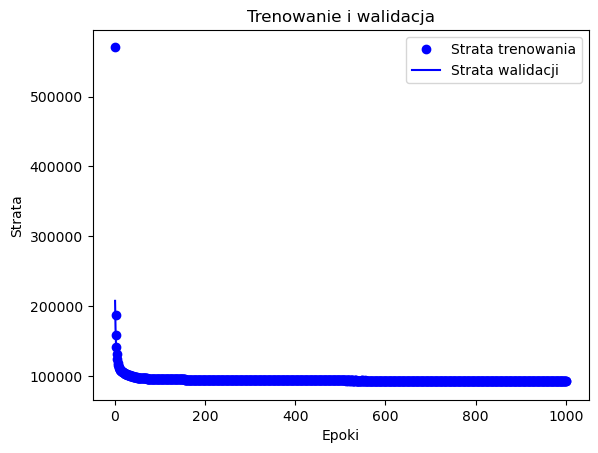

In [14]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Strata trenowania')
plt.plot(epochs, val_loss, 'b', label='Strata walidacji')
plt.title('Trenowanie i walidacja')
plt.xlabel('Epoki')
plt.ylabel('Strata')
plt.legend()
plt.show()

In [15]:
score = model.evaluate(test_features, test_labels)
print("Test loss: ", score[0])
print("Test accuracy: ", score[1])

220/220 [==============================] - 1s 2ms/step - loss: 93736.1484 - mean_absolute_error: 93736.1484
Test loss:  93736.1484375
Test accuracy:  93736.1484375


In [16]:
predictions = model.predict(test_features)
print('Prediction: ', predictions[5])
print('Expected: ', test_labels.to_numpy()[5])

220/220 [==============================] - 0s 2ms/step
Prediction:  [445615.5]
Expected:  380000


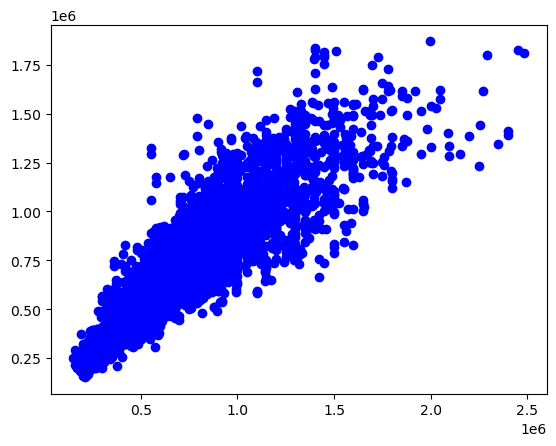

In [17]:
plt.plot(test_labels.to_numpy(), predictions, 'bo')
plt.show()

In [18]:
model.save('regression1.keras')